## Author: Sruti Munukutla
## Part 1 Project 2

In [94]:
### split data into test and train datasets (25% random test data)
%run -i 'split_data.py'

Training dataset filename: training_dataset_0.25.csv
75.0% training data containing 551 samples
Test dataset filename: test_dataset_0.25.csv
25.0% test data containing 184 samples


In [192]:
df_train = pd.read_csv(train_file)
df_train.head(5)

,Index,Age,Hours per day,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
0,1,18,3.0,1,0,1,2,0,3,1,0,3,2,3,0,2,3.0,0.0,1.0,0.0
1,2,63,1.5,2,0,0,1,3,1,1,0,2,2,1,3,1,7.0,2.0,2.0,1.0
2,3,18,4.0,0,0,3,1,1,3,2,2,1,0,1,1,3,7.0,7.0,10.0,2.0
3,4,61,2.5,2,0,0,0,3,2,2,0,2,2,0,0,0,9.0,7.0,3.0,3.0
4,5,18,4.0,0,0,1,3,0,3,2,0,2,3,3,0,1,7.0,2.0,5.0,9.0


In [ ]:
## Computing Distance metric - Euclidean Distance

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### returns the euclidean distance array between 2 set of points
def get_euclidean_distance(X_test, X_train):
    dist = []
    for test_pt in X_test:
        row_distance = []
        for train_pt in X_train:
            row_distance.append(np.linalg.norm(test_pt - train_pt, ord=2))
        dist.append(row_distance)
    return dist

In [ ]:
## Compute predicted y for the test set from distances.

In [ ]:
def get_predicted_y(Y_train, X_test, X_train):
    dist = get_euclidean_distance(X_test, X_train)
    result = []
    for row in dist:
        predicted_y = Y_train[np.argmin(row)]
        result.append(predicted_y)
    return result

train_file = 'training_dataset_0.25.csv'
test_file = 'test_dataset_0.25.csv'
df_train = pd.read_csv(train_file)

#training data which consists of all the independent variables
X_train_df = df_train.loc[:, "Frequency [Classical]":"Frequency [Video game music]"]
X_train = np.array(X_train_df)
Y_train = df_train['Anxiety'].tolist()
#to-predicted values/y_expected of test data

df_test = pd.read_csv(test_file)
Y_test = df_test['Anxiety'].tolist()


X_test_df = df_test.loc[:, "Frequency [Classical]":"Frequency [Video game music]"]
X_test = np.array(X_test_df)


y = get_predicted_y(Y_train, X_test, X_train)

Accuracy: 14.673913043478262%


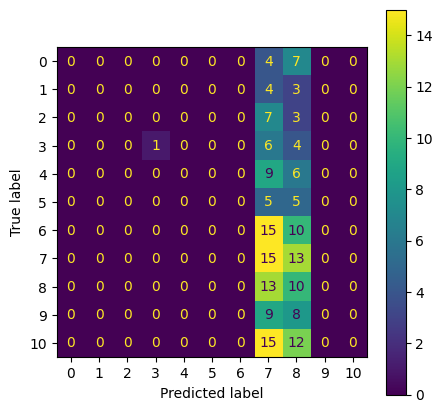

In [193]:
def get_accuracy(y, Y_test):
    total_points = len(y)
    counter = 1
    for i in range(0, len(y)):
        if y[i] == Y_test[i]:
            counter += 1
    return (counter/total_points)*100

print('Accuracy: ' + str(get_accuracy(y, Y_test)) + '%')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(Y_test, y)
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(Y_test, y, ax=ax)
plt.show()


In [172]:
from collections import Counter

def knn(k, X_train, Y_train, X_test):
    dist = get_euclidean_distance(X_test, X_train)
    result = []
    for row in dist:
        k_closest = sorted(range(len(row)), key=lambda x: row[x])[:k] 
        possible_y = Counter([Y_train[x] for x in k_closest])
        predicted_y = max(possible_y, key=possible_y.get)
        result.append(predicted_y)
    return result

14.673913043478262


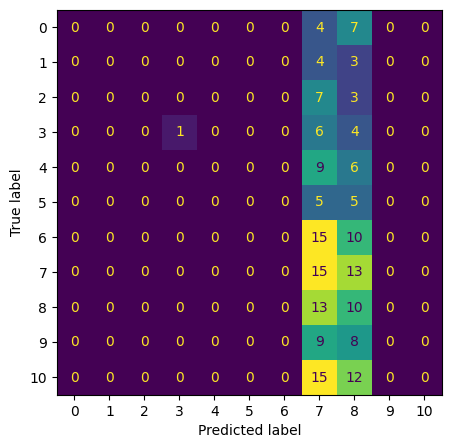

In [190]:
y = knn(200, X_train, Y_train, X_test)
print(get_accuracy(y, Y_test))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(Y_test, y)

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(
    Y_test, y, ax=ax, colorbar=False
)
plt.show()
